<a href="https://colab.research.google.com/github/emincingoz/Machine_Learning_Collection/blob/scratch/Image_Classification_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
#!curl is an utility for transferring data from ...
!curl https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -L -o CNN/catsanddogs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  58.8M      0  0:00:13  0:00:13 --:--:-- 60.3M


In [53]:
import os

os.chdir('/gdrive/My Drive/CNN/')

!ls

catsanddogs.zip		 gender_classification.ipynb
fashion_MNIST_CNN.ipynb  Image_Classification_from_Scratch.ipynb


In [55]:
!unzip -q catsanddogs.zip
!ls

 catsanddogs.zip			  'MSR-LA - 3467.docx'
 fashion_MNIST_CNN.ipynb		   PetImages
 gender_classification.ipynb		  'readme[1].txt'
 Image_Classification_from_Scratch.ipynb


In [56]:
!ls PetImages

Cat  Dog


## Filter Out Corrupted Images

[Wikipedia](https://en.wikipedia.org/wiki/JPEG_File_Interchange_Format#File_format_structure) explains that JPG files contain the string "JFIF" at the beginning of the file, encoded as bytes

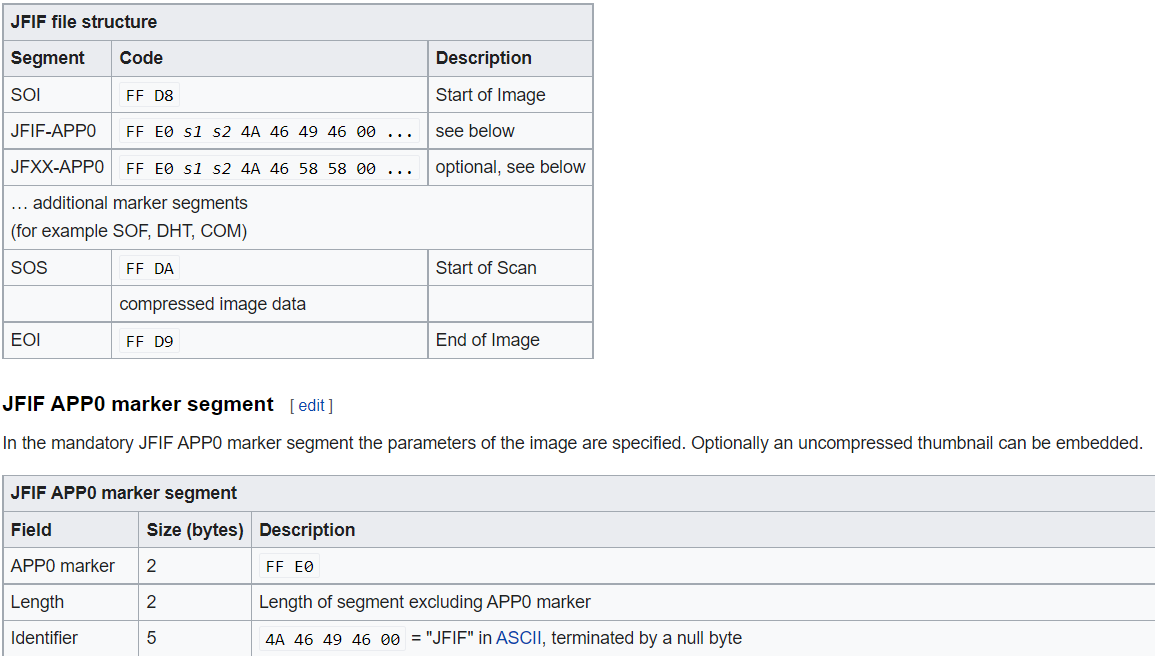

In [59]:
import os

num_skipped = 0
for folder_name in('Cat', 'Dog'):
  # add folder_name to PetImages
  folder_path = os.path.join('PetImages', folder_name)

  # It keeps the files in folder_path as a list
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)

    try:
      # 'rb': Opens the file in binary format for reading
      fobj = open(fpath, 'rb')
      # tf.compat.as_bytes("JFIF") converts the string "JFIF" to bytes.
      # You could also just use b'JFIF'
      # fobj.peek(10) theoretically returns the first 10 bytes of the file
      is_jfif = tf.compat.as_bytes('JFIF') in fobj.peek(10)
    finally:
      fobj.close()

    if not is_jfif:
      num_skipped += 1

      # delete corrupted images
      os.remove(fpath)

print('Deleted %d images' % num_skipped)

Deleted 1561 images


## Generate a Dataset

In [62]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (180, 180)
batch_size = 32

train_ds = image_dataset_from_directory('PetImages', 
                                        validation_split = 0.2, 
                                        subset = 'training', 
                                        seed = 1337, 
                                        image_size = image_size, 
                                        batch_size = batch_size) 

val_ds = image_dataset_from_directory('PetImages', 
                                        validation_split = 0.2, 
                                        subset = 'validation', 
                                        seed = 1337, 
                                        image_size = image_size, 
                                        batch_size = batch_size) 

Found 23439 files belonging to 2 classes.
Using 18752 files for training.
Found 23439 files belonging to 2 classes.
Using 4687 files for validation.


In [66]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## Visualize the Data

* label 1 is 'dog'
* label 0 is 'cat'


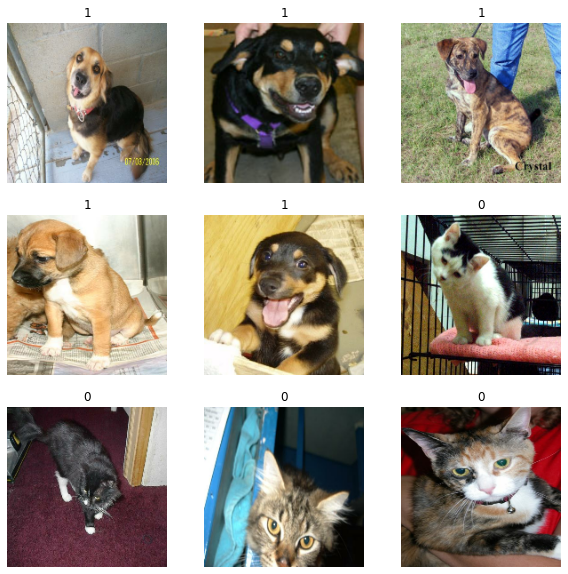

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis('off')

## Using Image Data Augmentation

When you don't have a large image dataset, it's a good idea to artificially introduce sample diversity by applying random yet realistic transformations

In [76]:
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip('horizontal'),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.5),
          layers.RandomContrast(0.2),
          layers.RandomTranslation(0.2, 0.2),
    ]
)

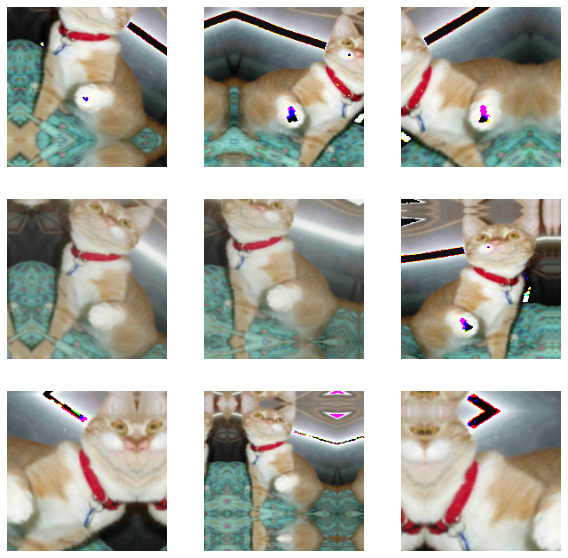

In [88]:
plt.figure(figsize = (10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')